In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
gal_csv=pd.read_csv('/home/kevin/aufklarung_astro_station/project2/sqlgalaxy_table.csv')
gal_csv.columns

In [7]:
# Cleaning of data to remove outliers
exclude_columns=["specObjID", "class", "subClass", "ra", "dec", "mjd"]
gal_csv_exc=gal_csv.drop(columns=exclude_columns)


gal_csv_exc= gal_csv_exc[ (gal_csv_exc
						 <= 
						 10*gal_csv_exc.median())
						  &
						  (gal_csv_exc 
						 >= 
						 -10*gal_csv_exc.median())  ]

gal_csv_exc.fillna(0,inplace=True)


In [8]:
#Applying clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(gal_csv_exc[["sfr_tot_p50", "lgm_tot_p50",
										 "oh_p50", "z"
										   ]])


/home/kevin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'log Mass p50')

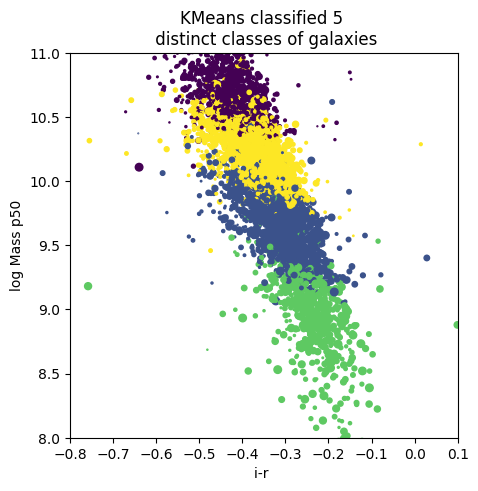

In [9]:
#Visualisation
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc["i"]-gal_csv_exc["r"], 
			gal_csv_exc["lgm_tot_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=labels)
plt.xlim([-0.8,0.1])
plt.ylim([8,11])
plt.title(f"KMeans classified {len(np.unique(labels))} \n distinct classes of galaxies")
plt.xlabel('i-r ')
plt.ylabel('log Mass p50')

In [ ]:
# Attach the classified labels and then save the new updated csv file
gal_csv["labels"]=labels
gal_csv.to_csv("sqlgalaxy_table_kmeans_classified.csv", index=False)